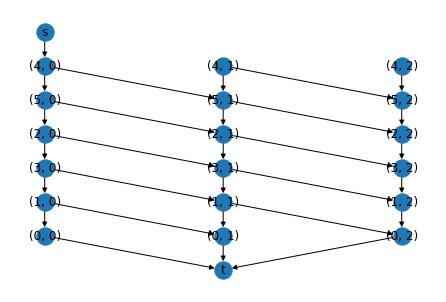

In [1]:
from orbitope import create_orbitope_graph

ordering = [4,5,2,3,1,0]
k = 3

OG = create_orbitope_graph(ordering,k)

In [2]:
xval_lol = [
    [0.5,0.25,0.25],
    [0.5,0.25,0.25],
    [0.5,0.25,0.25],
    [0.5,0.25,0.25],
    [1.0,0.0,0.0],
    [1.0,0.0,0.0]
]

In [3]:
n = len(ordering)
xval = { (i,j) : xval_lol[i][j] for i in range(n) for j in range(k)}

In [4]:
xval[4,0]

1.0

In [5]:
xval[3,0]

0.5

In [6]:
xbar = xval.copy()
print(xbar)

{(0, 0): 0.5, (0, 1): 0.25, (0, 2): 0.25, (1, 0): 0.5, (1, 1): 0.25, (1, 2): 0.25, (2, 0): 0.5, (2, 1): 0.25, (2, 2): 0.25, (3, 0): 0.5, (3, 1): 0.25, (3, 2): 0.25, (4, 0): 1.0, (4, 1): 0.0, (4, 2): 0.0, (5, 0): 1.0, (5, 1): 0.0, (5, 2): 0.0}


In [7]:
for j in range(k-1,-1,-1):
    print(j)

2
1
0


In [8]:
xbar = xval.copy()

for j in range(k-2,-1,-1):
    for i in range(n):
        xbar[i,j] += xbar[i,j+1]

print(xbar)

{(0, 0): 1.0, (0, 1): 0.5, (0, 2): 0.25, (1, 0): 1.0, (1, 1): 0.5, (1, 2): 0.25, (2, 0): 1.0, (2, 1): 0.5, (2, 2): 0.25, (3, 0): 1.0, (3, 1): 0.5, (3, 2): 0.25, (4, 0): 1.0, (4, 1): 0.0, (4, 2): 0.0, (5, 0): 1.0, (5, 1): 0.0, (5, 2): 0.0}


In [9]:
import networkx as nx

for i,j in OG.edges:
    OG.edges[i,j]['edge_weight'] = 1

for p in range(k):
    
    v = ordering[p]
    
    path_start = (v,p)
    (distance,path) = nx.single_source_dijkstra(OG,weight='edge_weight',source=path_start)
    
    for node in distance.keys():
        
        if node == 't':
            continue
            
        (i,j) = node
        
        print("distance from",path_start,"to (i,j) =",node,"is",distance[node])
    

distance from (4, 0) to (i,j) = (4, 0) is 0
distance from (4, 0) to (i,j) = (5, 0) is 1
distance from (4, 0) to (i,j) = (5, 1) is 1
distance from (4, 0) to (i,j) = (2, 0) is 2
distance from (4, 0) to (i,j) = (2, 1) is 2
distance from (4, 0) to (i,j) = (2, 2) is 2
distance from (4, 0) to (i,j) = (3, 0) is 3
distance from (4, 0) to (i,j) = (3, 1) is 3
distance from (4, 0) to (i,j) = (3, 2) is 3
distance from (4, 0) to (i,j) = (1, 0) is 4
distance from (4, 0) to (i,j) = (1, 1) is 4
distance from (4, 0) to (i,j) = (1, 2) is 4
distance from (4, 0) to (i,j) = (0, 0) is 5
distance from (4, 0) to (i,j) = (0, 1) is 5
distance from (4, 0) to (i,j) = (0, 2) is 5
distance from (5, 1) to (i,j) = (5, 1) is 0
distance from (5, 1) to (i,j) = (2, 1) is 1
distance from (5, 1) to (i,j) = (2, 2) is 1
distance from (5, 1) to (i,j) = (3, 1) is 2
distance from (5, 1) to (i,j) = (3, 2) is 2
distance from (5, 1) to (i,j) = (1, 1) is 3
distance from (5, 1) to (i,j) = (1, 2) is 3
distance from (5, 1) to (i,j) = 

In [10]:
for i,j in OG.edges:
    OG.edges[i,j]['edge_weight'] = 0

for p in range(1,n):

    i = ordering[p]
    pi = ordering[p-1]
    
    for j in range(k):
        node = (i,j)
        pnode = (pi,j)
        OG.edges[pnode,node]['edge_weight'] = xval[i,j]
        

In [11]:
def construct_position(ordering):
    position = [-1 for i in range(len(ordering))]
    for p in range(len(ordering)):
        v = ordering[p]
        position[v] = p
    return position

In [12]:
position = construct_position(ordering)

for p in range(k):
    
    v = ordering[p]
    
    path_start = (v,p)
    (distance,path) = nx.single_source_dijkstra(OG,weight='edge_weight',source=path_start)
    
    for node in distance.keys():
        
        if node == 't':
            continue
            
        (i,j) = node
        
        #print("distance from",path_start,"to (i,j) =",node,"is",distance[node])
        
        #print("distance from",path_start,"to (i,j) =",node,"plus x[path_start] is",distance[node]+xval[path_start])
        
        my_path = path[node]
        #print("my_path",my_path)
        
        S = list()
        
        for pos in range(len(my_path)):
            
            path_node = my_path[pos]
            (path_node_i, path_node_j) = path_node
            
            if path_node == path_start:
                S.append(path_node)
            else:
                prev_path_node = my_path[pos-1]
                
                (prev_i,prev_j) = prev_path_node
                
                if path_node_j == prev_j:
                    S.append(path_node)
                
        #print("S =",S)
        
        S_weight = sum( xval[myi,myj] for (myi,myj) in S )
        #print("S_weight =",S_weight)
        
        pos_i = position[i]
        
        if pos_i < n-1 and j < k-1:
            
            next_i = ordering[pos_i+1]
            
            if xbar[next_i,j+1] > S_weight:
                print("distance from",path_start,"to (i,j) =",node,"is",distance[node])
        
                print("distance from",path_start,"to (i,j) =",node,"plus x[path_start] is",distance[node]+xval[path_start])
                
                print("my_path",my_path)
                print("S_weight =",S_weight)
                
                print("Found inequality with violation",xbar[next_i,j+1]-S_weight)
                print("It has bar leader (",next_i,",",j+1,") and S=",S)
                

distance from (5, 1) to (i,j) = (5, 1) is 0
distance from (5, 1) to (i,j) = (5, 1) plus x[path_start] is 0.0
my_path [(5, 1)]
S_weight = 0.0
Found inequality with violation 0.25
It has bar leader ( 2 , 2 ) and S= [(5, 1)]
